<a href="https://colab.research.google.com/github/envirodatascience/final-project-hydro-team/blob/main/Project_617_April_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hydro Team

Research Questions:

A.	Comparative Analysis of Hydropower Designs: How do the key physical parameters (e.g., dam crest elevation, structural height, reservoir capacity) differ between US and Indian hydropower projects?

B.	Correlation Between Physical Design and Energy Generation: 	Is there a relationship between the structural features (e.g., dam height and reservoir capacity) and the electricity generation capacity of hydropower projects?

C.	Temporal and Operational Trends: 	How have hydropower projects evolved over time in each dataset (e.g., changes in commissioning years, structural dimensions, or operational statuses)?

D.	Influence of Administrative and Organizational Factors: 	Do project ownership or administrative units (e.g., different project organizations in the US and India) correlate with performance or operational status?




Import Pacakges

In [64]:
# import packages
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from mizani.formatters import scientific_format, percent_format, currency_format

Read Data

In [65]:
# Using link for the data on USA hydropower dams read data
link_usa = "https://raw.githubusercontent.com/youveena/FInal-Project/main/hydropower.csv"
df_usa = pd.read_csv(link_usa)
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Dimensions.Crest Elevation     336 non-null    float64
 1   Dimensions.Crest Length        336 non-null    float64
 2   Dimensions.Structural Height   336 non-null    float64
 3   Identity.Name                  336 non-null    object 
 4   Identity.Watercourse           336 non-null    object 
 5   Location.County                336 non-null    object 
 6   Location.Latitude              336 non-null    float64
 7   Location.Longitude             336 non-null    float64
 8   Location.State                 336 non-null    object 
 9   Identity.Project.Organization  336 non-null    object 
 10  Identity.Project.Year          336 non-null    int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 29.0+ KB


Intrepretation: The data set has 336 rows and 10 Columns, but requires cleaning.

**Renaming of columns** to make it easily comprehensible.

In [66]:
df_usa.rename(columns={"Dimensions.Crest Elevation": "Crest Elevation",
                     "Dimensions.Crest Length": "Crest Length", "Dimensions.Structural Height": "Structural Height",
"Identity.Name": "Name", "Identity.Watercourse": "Watercourse",
"Location.County": "County",
"Location.Latitude": "Latitude", "Location.Longitude": "Longitude",
"Location.State": "State", "Identity.Project.Organization": "Organisation",
"Identity.Project.Year": "Year"}, inplace=True)
df_usa.head()

,Crest Elevation,Crest Length,Structural Height,Name,Watercourse,County,Latitude,Longitude,State,Organisation,Year
0,1520.0,3800.00,86.00,Agate Dam,Dry Creek,Jackson,42.415500,-122.772300,Oregon,Rogue River Basin,1965
1,3348.0,1850.00,110.00,Agency Valley Dam,North Fork of the Malheur River,Malheur,43.911745,-118.154354,Oregon,Vale,1934
2,5510.0,76300.00,265.00,Alcova Dam,North Platte River,Natrona,42.548300,-106.719400,Wyoming,Kendrick,1935
3,2172.5,2784.18,132.17,Almena Diversion Dam,Prairie Dog Creek,Norton,39.766670,-100.100410,Kansas,PSMBP - Almena,1967
4,1564.0,1104.00,110.00,Altus Dam,"North Fork, Red River",Greer/Kiowa,34.883300,-99.300000,Oklahoma,W. C. Austin,1941


In [67]:
# Clean Data. Since Year of construction can not be 0, hence that is erroneous and need not be considered for our analysis
df_usa = df_usa[df_usa["Year"] != 0]
df_usa.head()


,Crest Elevation,Crest Length,Structural Height,Name,Watercourse,County,Latitude,Longitude,State,Organisation,Year
0,1520.0,3800.00,86.00,Agate Dam,Dry Creek,Jackson,42.415500,-122.772300,Oregon,Rogue River Basin,1965
1,3348.0,1850.00,110.00,Agency Valley Dam,North Fork of the Malheur River,Malheur,43.911745,-118.154354,Oregon,Vale,1934
2,5510.0,76300.00,265.00,Alcova Dam,North Platte River,Natrona,42.548300,-106.719400,Wyoming,Kendrick,1935
3,2172.5,2784.18,132.17,Almena Diversion Dam,Prairie Dog Creek,Norton,39.766670,-100.100410,Kansas,PSMBP - Almena,1967
4,1564.0,1104.00,110.00,Altus Dam,"North Fork, Red River",Greer/Kiowa,34.883300,-99.300000,Oklahoma,W. C. Austin,1941


**Add relevant Units to the Columns**

In [68]:
# Add unit "Feet" to the column name of Crest Eleveation, Crest Length, Structural Height and keep other column as same
df_usa.rename(columns={"Crest Elevation": "Crest Elevation (Feet)",
                     "Crest Length": "Crest Length (Feet)", "Structural Height": "Structural Height (Feet)"}, inplace=True)
# Add unit "Degree North" to the column of Latitude and "Degree West" to the Column of Longitude
df_usa.rename(columns={"Latitude": "Latitude (Degree North)",
                     "Longitude": "Longitude (Degree West)"}, inplace=True)
# Keep Latitude and Longitude column vlaue to three decimal places
df_usa["Latitude (Degree North)"] = df_usa["Latitude (Degree North)"].round(3)
df_usa["Longitude (Degree West)"] = df_usa["Longitude (Degree West)"].round(3)
df_usa.head()

,Crest Elevation (Feet),Crest Length (Feet),Structural Height (Feet),Name,Watercourse,County,Latitude (Degree North),Longitude (Degree West),State,Organisation,Year
0,1520.0,3800.00,86.00,Agate Dam,Dry Creek,Jackson,42.416,-122.772,Oregon,Rogue River Basin,1965
1,3348.0,1850.00,110.00,Agency Valley Dam,North Fork of the Malheur River,Malheur,43.912,-118.154,Oregon,Vale,1934
2,5510.0,76300.00,265.00,Alcova Dam,North Platte River,Natrona,42.548,-106.719,Wyoming,Kendrick,1935
3,2172.5,2784.18,132.17,Almena Diversion Dam,Prairie Dog Creek,Norton,39.767,-100.100,Kansas,PSMBP - Almena,1967
4,1564.0,1104.00,110.00,Altus Dam,"North Fork, Red River",Greer/Kiowa,34.883,-99.300,Oklahoma,W. C. Austin,1941


In [69]:
# Clean Data: drop the rows where value of Year Column is less than 1800 as that is doubtful data and pertains to data entry error
df_usa = df_usa[df_usa["Year"] >= 1800]
df_usa.head()

,Crest Elevation (Feet),Crest Length (Feet),Structural Height (Feet),Name,Watercourse,County,Latitude (Degree North),Longitude (Degree West),State,Organisation,Year
0,1520.0,3800.00,86.00,Agate Dam,Dry Creek,Jackson,42.416,-122.772,Oregon,Rogue River Basin,1965
1,3348.0,1850.00,110.00,Agency Valley Dam,North Fork of the Malheur River,Malheur,43.912,-118.154,Oregon,Vale,1934
2,5510.0,76300.00,265.00,Alcova Dam,North Platte River,Natrona,42.548,-106.719,Wyoming,Kendrick,1935
3,2172.5,2784.18,132.17,Almena Diversion Dam,Prairie Dog Creek,Norton,39.767,-100.100,Kansas,PSMBP - Almena,1967
4,1564.0,1104.00,110.00,Altus Dam,"North Fork, Red River",Greer/Kiowa,34.883,-99.300,Oklahoma,W. C. Austin,1941


**Analyse Physical Parametres**

In [70]:
# Analysis of data on physical parametre "Crest Elevation" of the hydropower dam
df_usa["Crest Elevation (Feet)"].describe()

,Crest Elevation (Feet)
count,324.000000
mean,4322.213488
std,3493.858435
min,72.000000
25%,2213.000000
50%,4141.100000
75%,5717.500000
max,46255.000000


In [71]:
# Maximum value of crest elevation in the given data is 46000 feet approx, which is anomaly and error of decimals  when cross checked from the real data of individual dam,
# therefore correct the maximum value of crest elevation by dividing it by 10
df_usa.loc[df_usa["Crest Elevation (Feet)"] == df_usa["Crest Elevation (Feet)"].max(),
           "Crest Elevation (Feet)"] = df_usa["Crest Elevation (Feet)"].max() / 10
df_usa.head()

,Crest Elevation (Feet),Crest Length (Feet),Structural Height (Feet),Name,Watercourse,County,Latitude (Degree North),Longitude (Degree West),State,Organisation,Year
0,1520.0,3800.00,86.00,Agate Dam,Dry Creek,Jackson,42.416,-122.772,Oregon,Rogue River Basin,1965
1,3348.0,1850.00,110.00,Agency Valley Dam,North Fork of the Malheur River,Malheur,43.912,-118.154,Oregon,Vale,1934
2,5510.0,76300.00,265.00,Alcova Dam,North Platte River,Natrona,42.548,-106.719,Wyoming,Kendrick,1935
3,2172.5,2784.18,132.17,Almena Diversion Dam,Prairie Dog Creek,Norton,39.767,-100.100,Kansas,PSMBP - Almena,1967
4,1564.0,1104.00,110.00,Altus Dam,"North Fork, Red River",Greer/Kiowa,34.883,-99.300,Oklahoma,W. C. Austin,1941


In [72]:
# Statistical analysis of corrected data on "Crest Elevation" of dam
df_usa["Crest Elevation (Feet)"].describe()

,Crest Elevation (Feet)
count,324.000000
mean,4193.727377
std,2597.486693
min,72.000000
25%,2213.000000
50%,4141.100000
75%,5706.750000
max,10539.000000


In [73]:
# Analytical report physical parametre "crest length" of the dam
df_usa["Crest Length (Feet)"].describe()

,Crest Length (Feet)
count,324.000000
mean,3066.320185
std,7102.716705
min,20.000000
25%,698.500000
50%,1370.000000
75%,2784.180000
max,76665.000000


In [74]:
# Analysis of physical parametre of "structural height" of the dam
df_usa["Structural Height (Feet)"].describe()

,Structural Height (Feet)
count,324.000000
mean,142.164290
std,120.362588
min,6.000000
25%,54.750000
50%,129.500000
75%,183.500000
max,726.400000


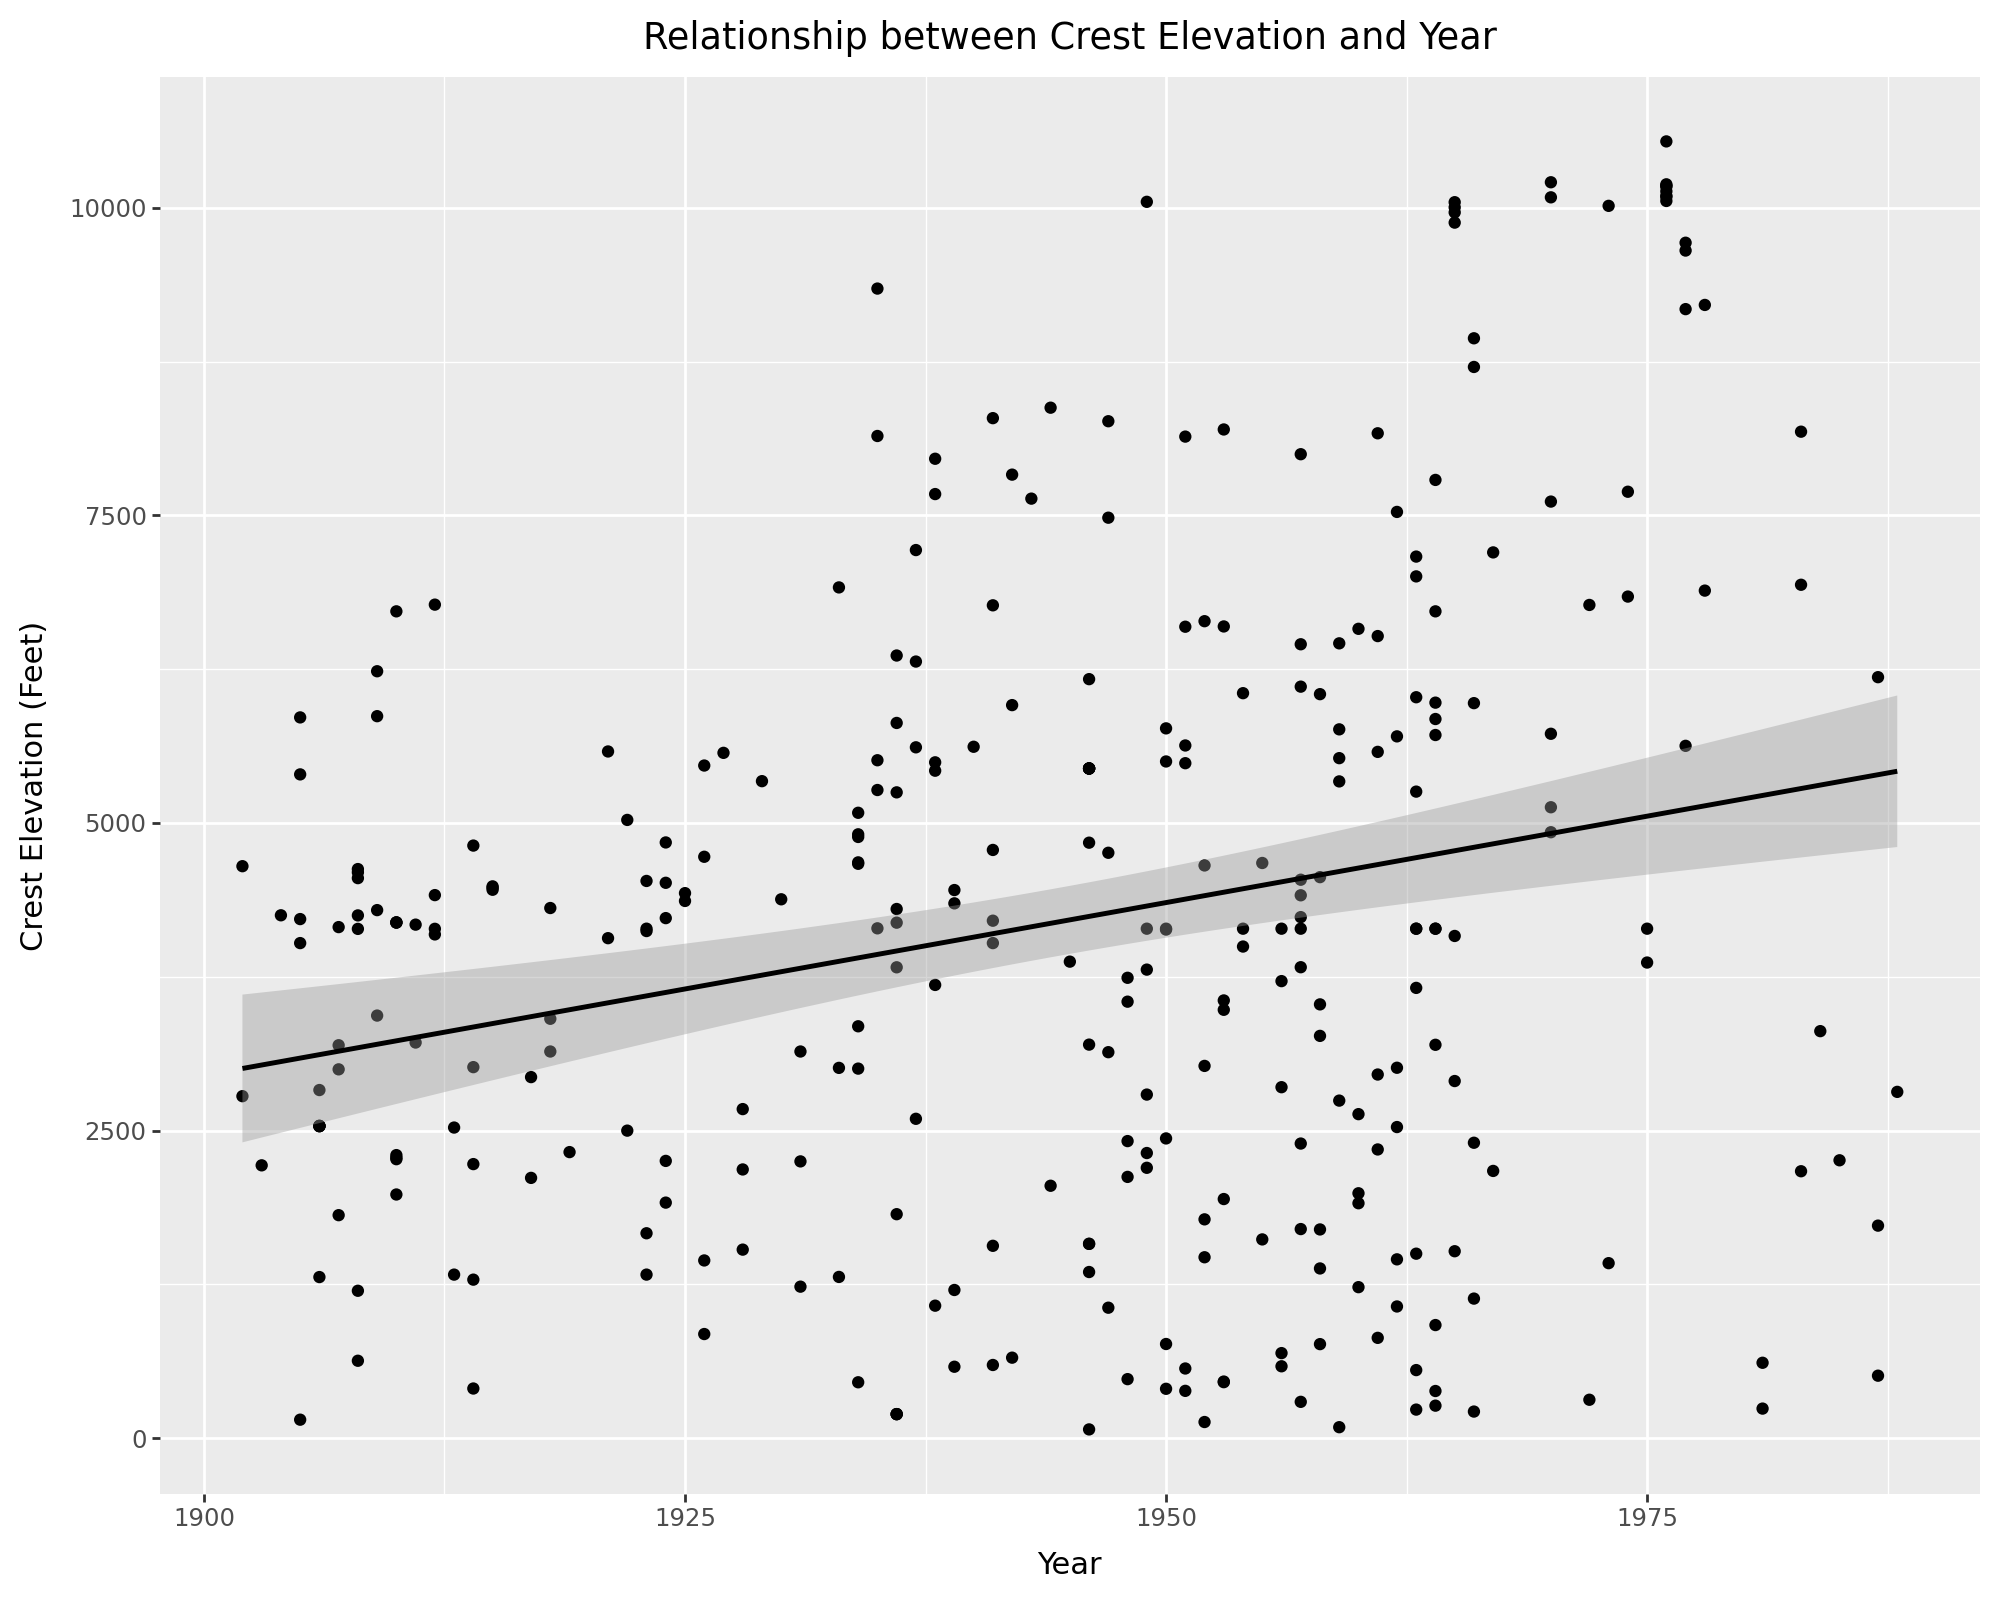

In [75]:
# Anlyse the relation between crest elevation and year

plotnine.options.figure_size = (10, 8)
(ggplot(df_usa, aes(x="Year", y="Crest Elevation (Feet)"))
 + geom_point()
 + geom_smooth(method="lm")
 + labs(title="Relationship between Crest Elevation and Year", x="Year", y="Crest Elevation (Feet)"))





Interpretation: Elevation of the crest is showing an increasing trend as the year progresses


Analysis of Data on hydropower dams in INDIA

In [76]:

# Read Data on India
link_India = "https://raw.githubusercontent.com/youveena/FInal-Project/refs/heads/main/iha_hydrodatabase_240919_csv.csv"
df_India = pd.read_csv(link_India)
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hydropower Station Name      182 non-null    object 
 1   Database Status              182 non-null    object 
 2   ID                           182 non-null    int64  
 3   Country                      182 non-null    object 
 4   ISO                          182 non-null    object 
 5   Reservoir Name               72 non-null     object 
 6   Lake Name                    9 non-null      object 
 7   Purpose                      182 non-null    object 
 8   Admin_unit                   181 non-null    object 
 9   Owner                        128 non-null    object 
 10  Near_city                    180 non-null    object 
 11  District                     44 non-null     object 
 12  River                        182 non-null    object 
 13  Main_basin          

In [77]:
# List column names at one place to have easy reference as there are number of columns
df_India.columns

Index(['Hydropower Station Name', 'Database Status', 'ID', 'Country', 'ISO',
       'Reservoir Name', 'Lake Name', 'Purpose', 'Admin_unit', 'Owner ',
       'Near_city', 'District ', 'River', 'Main_basin', 'Catch_Area ',
       'Op_Status', 'Comissioned', 'DamComplete', 'No_Units', 'Dam_hgt ',
       'WaterHeadhgt( max)', 'WaterHeadHgt (min)', 'Res_capacityMm3',
       'Res_area km2', 'HPP_elec_cap', 'Transm_exist', 'Transm_length',
       'Transm_planned', 'Hydropower_Type', 'Ann_firm_gen', 'Ann_tot_gen',
       'Lat (reservoir/dam)', 'Long (reservoir/dam)',
       'Lat (hydropower station 1)', 'Long (hydropower station 1)',
       'Lat (hydropower station 2)', 'Long (hydropower station 2)', 'Display',
       'Reference 1', 'Reference 2', 'Reference 3', 'Reference 4',
       'Reference 5', 'Reference 6', 'Reference 7', 'Reference 8',
       'Reference 9', 'Reference 10', 'Comment', 'Column1'],
      dtype='object')

In [78]:
# Data Cleaning: Drop all the reference column and comment column , as reference data is not required for our analysis
df_India = df_India.drop(['Reference 1', 'Reference 2', 'Reference 3', 'Reference 4',
       'Reference 5', 'Reference 6', 'Reference 7', 'Reference 8',
       'Reference 9', 'Reference 10', 'Comment'], axis=1)
df_India.head()

,Hydropower Station Name,Database Status,ID,Country,ISO,Reservoir Name,Lake Name,Purpose,Admin_unit,Owner,...,Ann_firm_gen,Ann_tot_gen,Lat (reservoir/dam),Long (reservoir/dam),Lat (hydropower station 1),Long (hydropower station 1),Lat (hydropower station 2),Long (hydropower station 2),Display,Column1
0,Kalpong,Matched with hydro station,179,India,IND,NaN,NaN,Hydropower,Andaman & Nicobar,A&N Administration,...,NaN,NaN,13.154389,92.967351,13.156224,92.961092,NaN,NaN,"Matched Dams, Stations and Reservoirs",NaN
1,Nagarjuna Sagar,Matched with hydro station,28,India,IND,Nagarjuna Sagar,NaN,"Multi-purpose Irrigation, Hydropower",Andhra Pradesh,APGENCO,...,NaN,NaN,16.575556,79.311667,16.569994,79.311388,16.578114,79.314049,"Matched Dams, Stations and Reservoirs",NaN
2,Penna Ahobilam,Matched with hydro station,29,India,IND,Dr KS Penna Ahobilam Balancing Reservoir,NaN,"Irrigation, Hydropower",Andhra Pradesh,APGENCO,...,NaN,50.0,14.790555,77.299166,14.791365,77.298283,NaN,NaN,"Matched Dams, Stations and Reservoirs",NaN
3,Srisailam,Matched with hydro station,156,India,IND,Srisailam,NaN,Hydropower,Andhra Pradesh,TSGENCO & APGENCO,...,NaN,4300.0,16.086892,78.897061,16.088635,78.901242,16.095738,78.903296,"Matched Dams, Stations and Reservoirs",NaN
4,Lower Subansiri,Under construction / stalled,182,India,IND,NaN,NaN,Hydropower,Assam/Arunachal Pradesh,National Hydroelectric Power Corporation (NHPC),...,NaN,7421.0,27.553600,94.258600,NaN,NaN,NaN,NaN,"Under Construction, stalled",NaN


In [79]:
# List the number of columns and rows where data value is NaN
df_India.isna().sum()

,0
Hydropower Station Name,0
Database Status,0
ID,0
Country,0
ISO,0
Reservoir Name,110
Lake Name,173
Purpose,0
Admin_unit,1
Owner,54


In [80]:
# Data Cleaning
# Retain Data as relevant for our research question
# Drop columns "Lat (hydropower station 1),Long (hydropower station 1),Lat (hydropower station 2),Long (hydropower station 2),Column1"
df_India = df_India.drop(['Lat (hydropower station 1)', 'Long (hydropower station 1)', 'Lat (hydropower station 2)', 'Long (hydropower station 2)', 'Column1'], axis=1)
df_India.head()


,Hydropower Station Name,Database Status,ID,Country,ISO,Reservoir Name,Lake Name,Purpose,Admin_unit,Owner,...,HPP_elec_cap,Transm_exist,Transm_length,Transm_planned,Hydropower_Type,Ann_firm_gen,Ann_tot_gen,Lat (reservoir/dam),Long (reservoir/dam),Display
0,Kalpong,Matched with hydro station,179,India,IND,NaN,NaN,Hydropower,Andaman & Nicobar,A&N Administration,...,5.25,NaN,NaN,NaN,Storage,NaN,NaN,13.154389,92.967351,"Matched Dams, Stations and Reservoirs"
1,Nagarjuna Sagar,Matched with hydro station,28,India,IND,Nagarjuna Sagar,NaN,"Multi-purpose Irrigation, Hydropower",Andhra Pradesh,APGENCO,...,810,220/132,NaN,NaN,Storage,NaN,NaN,16.575556,79.311667,"Matched Dams, Stations and Reservoirs"
2,Penna Ahobilam,Matched with hydro station,29,India,IND,Dr KS Penna Ahobilam Balancing Reservoir,NaN,"Irrigation, Hydropower",Andhra Pradesh,APGENCO,...,20,132,NaN,NaN,Storage,NaN,50.0,14.790555,77.299166,"Matched Dams, Stations and Reservoirs"
3,Srisailam,Matched with hydro station,156,India,IND,Srisailam,NaN,Hydropower,Andhra Pradesh,TSGENCO & APGENCO,...,900,220/132,NaN,NaN,Storage,NaN,4300.0,16.086892,78.897061,"Matched Dams, Stations and Reservoirs"
4,Lower Subansiri,Under construction / stalled,182,India,IND,NaN,NaN,Hydropower,Assam/Arunachal Pradesh,National Hydroelectric Power Corporation (NHPC),...,2000,NaN,NaN,NaN,Run-of-River,NaN,7421.0,27.553600,94.258600,"Under Construction, stalled"


In [81]:
# Clean Nan value in Lat (reservoir/dam)  and Long (reservoir/dam) as each location should have some lat and long
df_India = df_India.dropna(subset=["Lat (reservoir/dam)", "Long (reservoir/dam)"])
# Max and Min value for ["Lat (reservoir/dam)", "Long (reservoir/dam)"]
df_India[["Lat (reservoir/dam)", "Long (reservoir/dam)"]].max()



,0
Lat (reservoir/dam),34.14418
Long (reservoir/dam),94.25860


In [82]:
# Min value for ["Lat (reservoir/dam)", "Long (reservoir/dam)"]
df_India[["Lat (reservoir/dam)", "Long (reservoir/dam)"]].min()

,0
Lat (reservoir/dam),8.522037
Long (reservoir/dam),73.058815


In [83]:
# Convert HPP_elec_cap from object to float, handling arithmetic operations
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        # If it's an arithmetic operation, evaluate it
        try:
            return eval(value)
        except (TypeError, NameError, SyntaxError):
            # Handle cases where eval might fail (e.g., non-numeric operations)
            return np.nan  # Or any other appropriate handling
# Apply the custom function
df_India["HPP_elec_cap"] = df_India["HPP_elec_cap"].apply(convert_to_float)
#Analyse physical parameter "HPP_elec_cap"
df_India["HPP_elec_cap"].describe()

<ipython-input-83-bdf8b88253be>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,HPP_elec_cap
count,112.000000
mean,251.535268
std,383.149850
min,0.500000
25%,20.000000
50%,77.500000
75%,308.750000
max,2000.000000


In [84]:
# Analyse the column Comissioned_Year
df_India["Comissioned"].describe()

,Comissioned
count,152
unique,62
top,Operational since 1965
freq,8


In [85]:
# Extract numerical year values using regex
import re
df_India['Comissioned_Year'] = df_India['Comissioned'].str.extract(r'(\d{4})') # Extract 4-digit years

# Convert the new column to numeric, handling errors
df_India['Comissioned_Year'] = pd.to_numeric(df_India['Comissioned_Year'], errors='coerce')

# Filter rows with valid years
df_India = df_India.dropna(subset=['Comissioned_Year'])
df_India = df_India[df_India['Comissioned_Year'] == df_India['Comissioned_Year'].astype(int)]

<ipython-input-85-1150239ecd73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-85-1150239ecd73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Progress of Cumulative Hydro-Power Generation Capacity (India)')

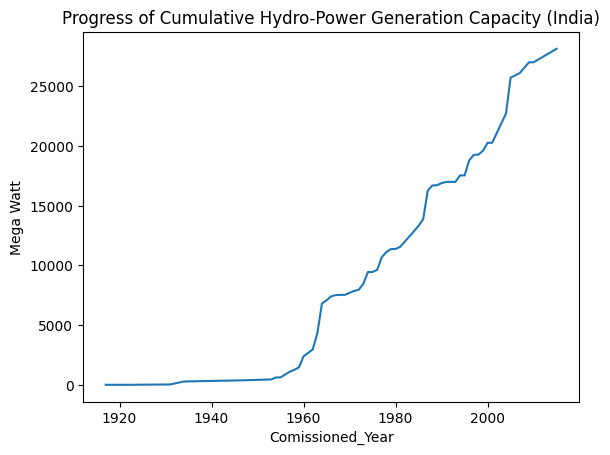

In [86]:
# Plot line graph of cumulative HPP_elec_cap vis a vis Comissioned year
df_India.groupby("Comissioned_Year")["HPP_elec_cap"].sum().cumsum().plot(kind="line")
# Add y axes lable " Mega Watt)"
plt.ylabel("Mega Watt")
# Add chart title
plt.title("Progress of Cumulative Hydro-Power Generation Capacity (India)")


In [87]:
# Analyse Dam_hgt
df_India["Dam_hgt "].describe()

,Dam_hgt
count,144.000000
mean,64.699097
std,47.068682
min,11.790000
25%,38.925000
50%,52.020000
75%,73.487500
max,365.000000


In [88]:
# Convert the dam hgt from metre to feet and add a new column
df_India["Dam_hgt (Feet)"] = df_India["Dam_hgt "] * 3.28084
df_India["Dam_hgt (Feet)"].head(5)

,Dam_hgt (Feet)
0,103.34646
1,410.10500
3,475.72180
4,426.50920
5,100.06562


In [89]:
# Create a table to compare maximum, minimum, mean from df_India["Dam_hgt (Feet)"] and df_usa["Structural Height (Feet)"]
import pandas as pd

# Assuming df_India and df_usa are defined and the relevant columns exist

# Describe statistics for each column
india_desc = df_India["Dam_hgt (Feet)"].describe()
usa_desc = df_usa["Structural Height (Feet)"].describe()

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    "India": india_desc,
    "USA": usa_desc
})


# restrict the figures to one decimal point
comparison_df = comparison_df.round(1)
# Add title of comparison table
comparison_df.index.name = "Comparison Table of Hydropower Dam Height (Feet)"
# Display the comparison table
print(comparison_df)








                                                   India    USA
Comparison Table of Hydropower Dam Height (Feet)               
count                                              144.0  324.0
mean                                               212.3  142.2
std                                                154.4  120.4
min                                                 38.7    6.0
25%                                                127.7   54.8
50%                                                170.7  129.5
75%                                                241.1  183.5
max                                               1197.5  726.4


In [90]:
# plot geospatial map of df_usa
import folium
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
for index, row in df_usa.iterrows():
    folium.Marker([row["Latitude (Degree North)"], row["Longitude (Degree West)"]]).add_to(m)
m


In [91]:
# plot Geospatial map of df_India based on Lat (reservoir/dam) and  Long (reservoir/dam)
import folium
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
for index, row in df_India.iterrows():
    folium.Marker([row["Lat (reservoir/dam)"], row["Long (reservoir/dam)"]]).add_to(m)
m



In [92]:
# Analyse  Res_capacityMm3
df_India["Res_capacityMm3"].describe()

,Res_capacityMm3
count,142.000000
mean,1375.023352
std,2552.935320
min,0.072000
25%,20.844250
50%,215.800000
75%,1367.500000
max,12220.000000


In [93]:
# Calculate reservoir area of hydropower dams in usa by multiplying crest length, crest height

In [94]:
# Analyse dam hgt
df_India["Dam_hgt "].describe()

,Dam_hgt
count,144.000000
mean,64.699097
std,47.068682
min,11.790000
25%,38.925000
50%,52.020000
75%,73.487500
max,365.000000


/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


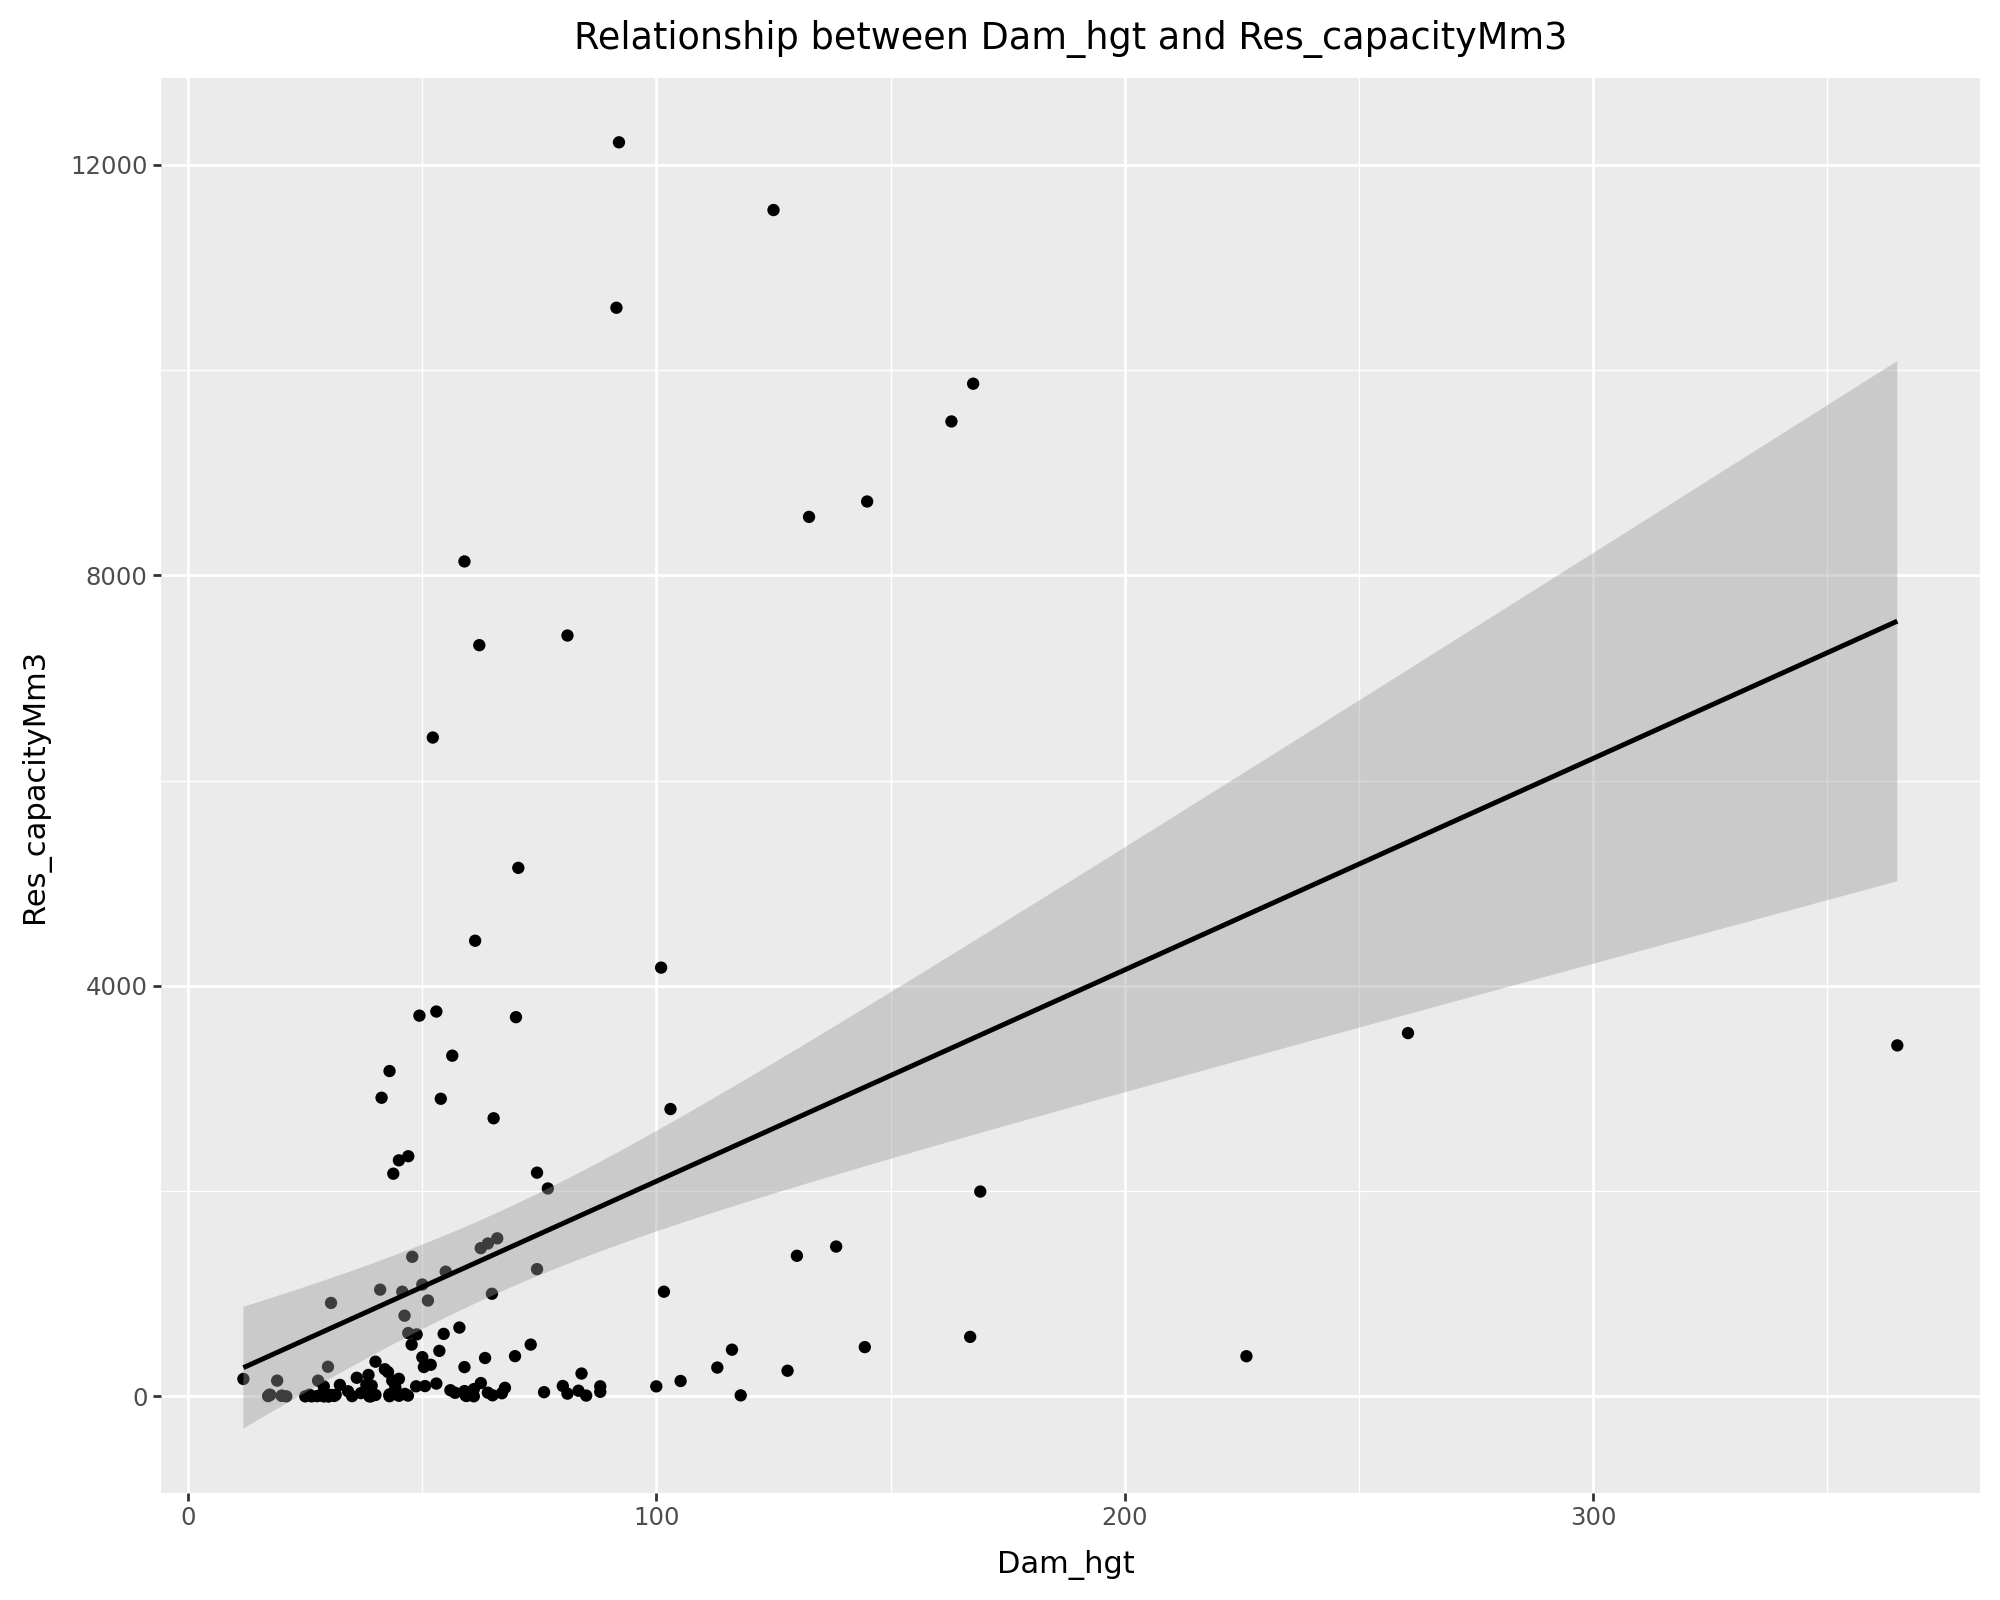

In [95]:
# Analyse the relationship between catch area and dam hgt
import plotnine
from plotnine import *
plotnine.options.figure_size = (10, 8)
(ggplot(df_India, aes(x="Dam_hgt ", y="Res_capacityMm3"))
 + geom_point()
 + geom_smooth(method="lm")
 + labs(title="Relationship between Dam_hgt and Res_capacityMm3", x="Dam_hgt ", y="Res_capacityMm3"))
plotnine.options.figure_size = (10, 8)
(ggplot(df_India, aes(x="Dam_hgt ", y="Res_capacityMm3"))
 + geom_point()
 + geom_smooth(method="lm")
 + labs(title="Relationship between Dam_hgt and Res_capacityMm3", x="Dam_hgt ", y="Res_capacityMm3"))

In [96]:
# Analyse  Res_area km2 and HPP_elec_cap
df_India["Res_area km2"].describe()

,Res_area km2
count,131
unique,128
top,60
freq,2


In [97]:
df_India["HPP_elec_cap"].describe()

,HPP_elec_cap
count,109.00000
mean,258.21055
std,386.26552
min,0.50000
25%,22.50000
50%,90.00000
75%,320.00000
max,2000.00000


(B) Relationship Between dam height and electricity generation

/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sur

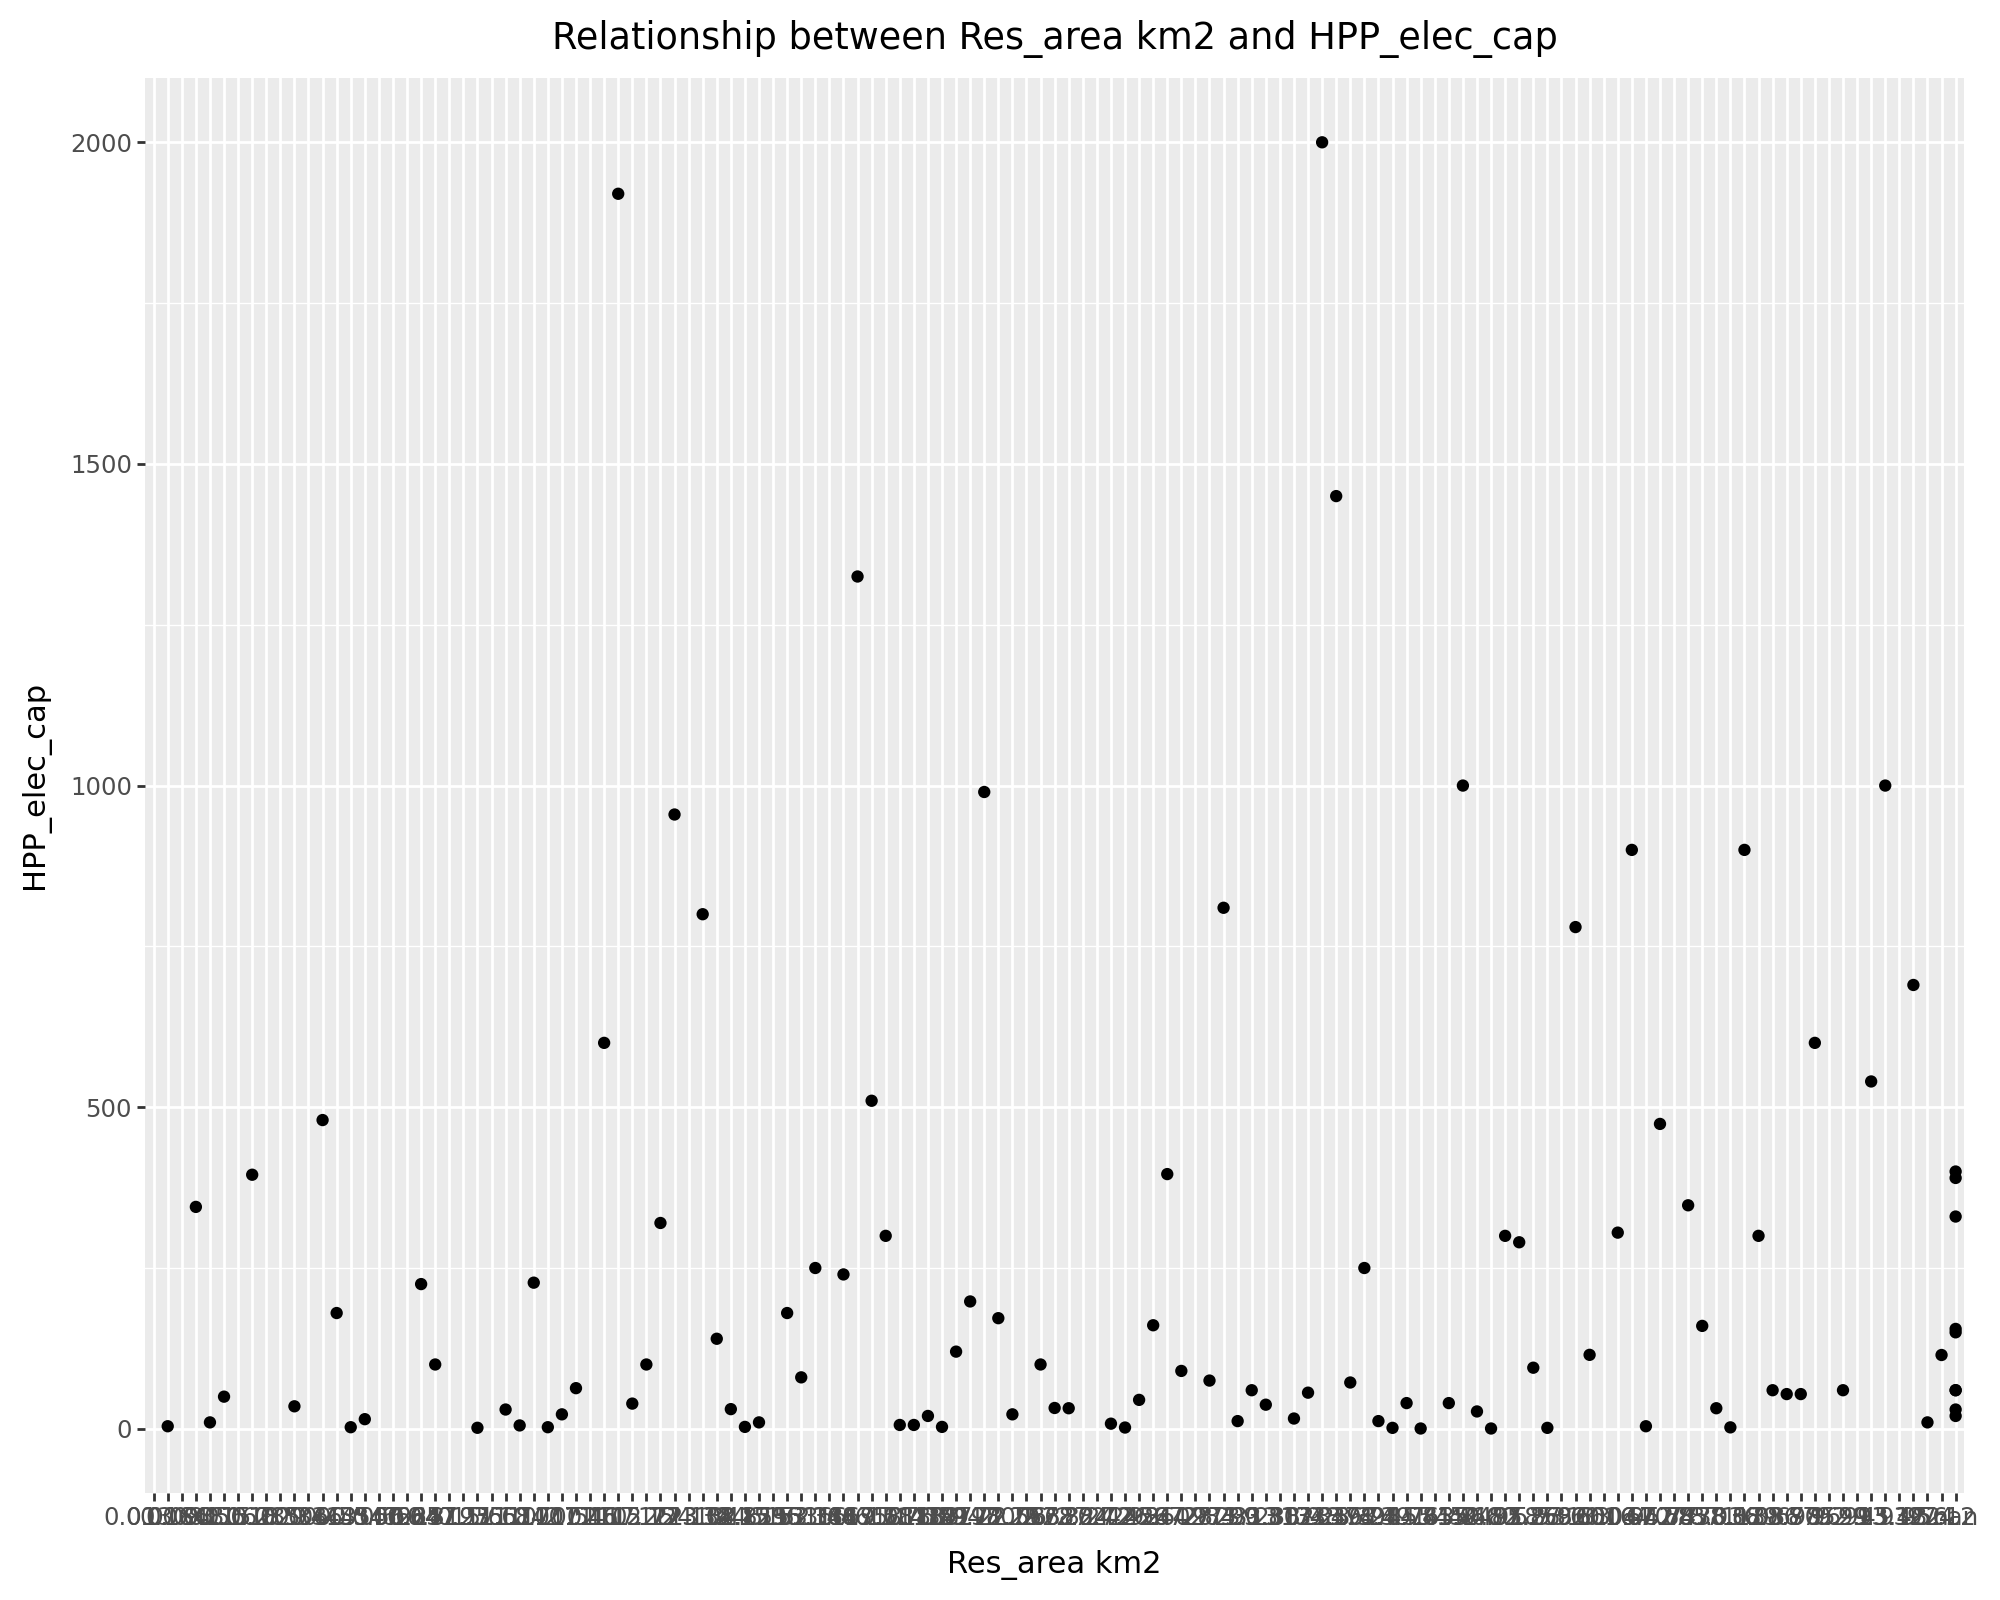

In [98]:
# relationship between reservoir area and elce cap
import plotnine
from plotnine import ggplot, aes, geom_point, geom_smooth, labs

plotnine.options.figure_size = (10, 8)
(ggplot(df_India, aes(x="Res_area km2", y="HPP_elec_cap"))
 + geom_point()
 + geom_smooth(method="lm")
 + labs(title="Relationship between Res_area km2 and HPP_elec_cap", x="Res_area km2", y="HPP_elec_cap"))
# The lines below were indented, causing the error. They are now aligned correctly.
#+ geom_smooth(method="lm") # This line seems redundant as it's already defined above.
#+ labs(title="Relationship between Res_area km2 and HPP_elec_cap", x="Res_area km2", y="HPP_elec_cap")) # This line is also redundant.

(C) **Temporal and Operational Trends**

Text(0.5, 0, 'Year')

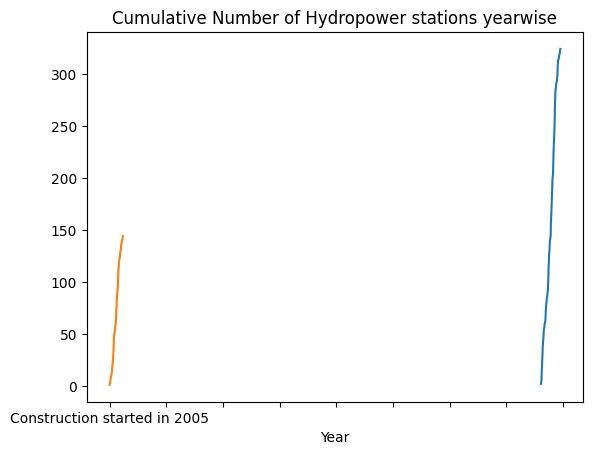

In [99]:
# Line graph showing comparative trend of  cumulative number of hydropwer stations progressing yearwise in usa and cumulative number of hydropower stations with progress of comissioned year in India
df_usa_Year_group = df_usa.groupby("Year")
df_usa_Year_group.size().cumsum().plot(kind="line")
df_India["Comissioned"].value_counts().sort_index().cumsum().plot(kind="line")
# Chart title and lable axes
plt.title("Cumulative Number of Hydropower stations yearwise")
plt.xlabel("Year")

Text(0, 0.5, 'Number of Hydropower stations')

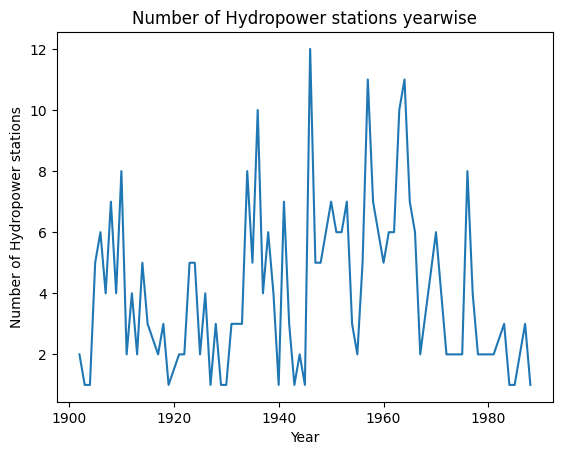

In [100]:
# plot a line graph of yearwise number of dams of usa, with appropriate chart title and axes lable
import matplotlib.pyplot as plt # Import the library

df_usa["Year"].value_counts().sort_index().plot(kind="line")
# Add chart title and lable axes
plt.title("Number of Hydropower stations yearwise")
plt.xlabel("Year")
plt.ylabel("Number of Hydropower stations")

Text(0.5, 0, 'Year')

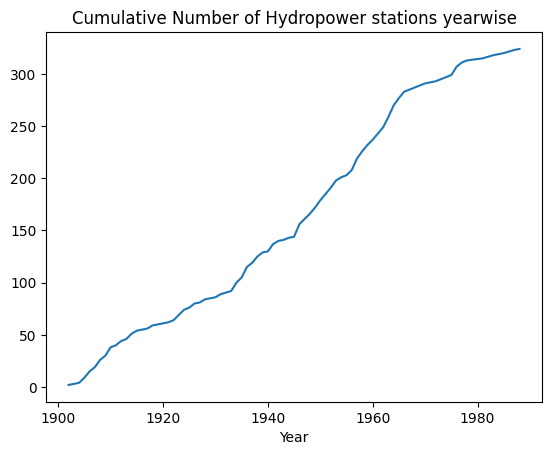

In [101]:
# Line graph of cumulative number of dams with progress of year
df_usa["Year"].value_counts().sort_index().cumsum().plot(kind="line")
# Add chart title and lable axes
plt.title("Cumulative Number of Hydropower stations yearwise")
plt.xlabel("Year")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

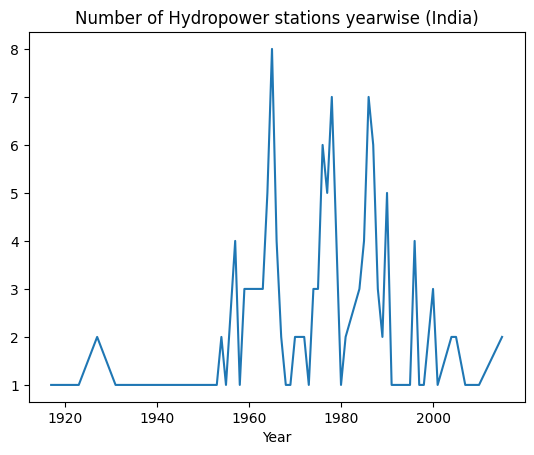

In [102]:
# Plot line graph for number of dams commissioned year wise for India
df_India["Comissioned_Year"].value_counts().sort_index().plot(kind="line")
# Add chart title and lable axes
plt.title("Number of Hydropower stations yearwise (India)")
plt.xlabel("Year")
plt

Text(0.5, 0, 'Year')

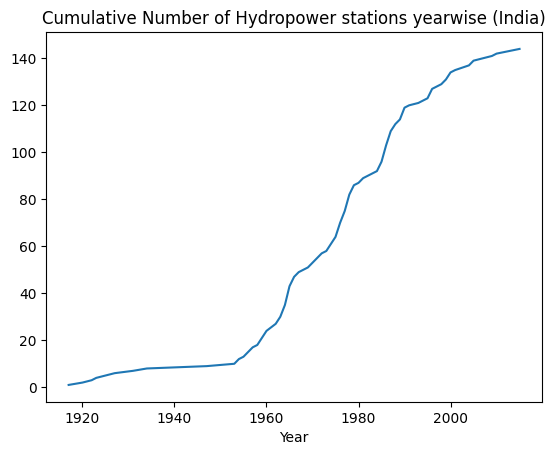

In [103]:
# plot line graph Comissioned_Year and cumulative number of dams in India
df_India["Comissioned_Year"].value_counts().sort_index().cumsum().plot(kind="line")
# Add chart title and lable axes
plt.title("Cumulative Number of Hydropower stations yearwise (India)")
plt.xlabel("Year")

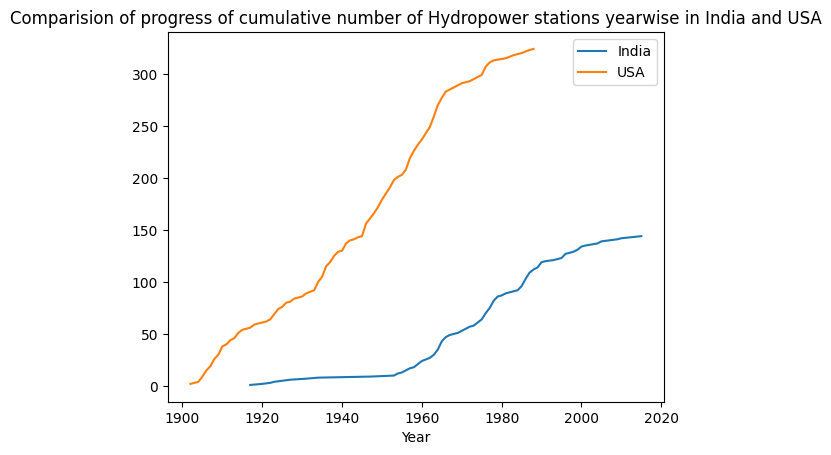

In [104]:
# commissioned year wise line graph for cumulative number of dams in India
df_India["Comissioned_Year"].value_counts().sort_index().cumsum().plot(kind="line")
# Add chart title and lable axes
plt.title("Cumulative Number of Hydropower stations yearwise (India)")
plt.xlabel("Year")
# Add another line showing year wise cumulative number of dams in usa
df_usa["Year"].value_counts().sort_index().cumsum().plot(kind="line")
# Add chart title and lable axes
plt.title("Comparision of progress of cumulative number of Hydropower stations yearwise in India and USA")
plt.xlabel("Year")
# Lable legend
plt.legend(["India", "USA"])

<Axes: title={'center': 'Number of Hydropower stations yearwise (USA)'}, xlabel='Year', ylabel='Number of Hydropower stations'>

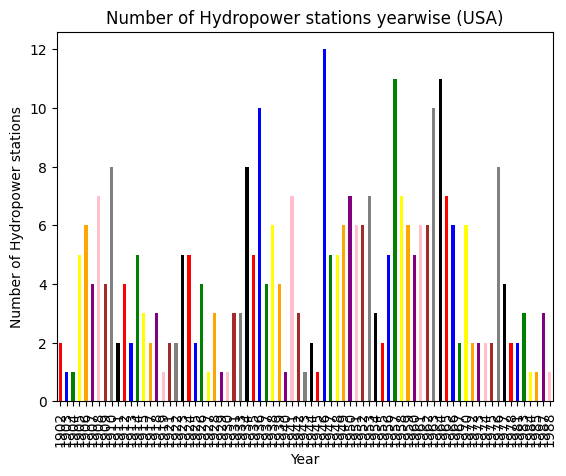

In [105]:
# Plot above data into bar diagram of temporal trend of usa data with decadal trend and number of hydro power dams
df_usa_Year_group.size().plot(kind="bar")
# add chart title
plt.title("Number of Hydropower stations yearwise (USA)")
# lable axes
plt.xlabel("Decadal Year Comissioned")
plt.ylabel("Number of Hydropower stations")
# Color bars
df_usa_Year_group.size().plot(kind="bar", color=["red", "blue", "green", "yellow", "orange", "purple", "pink", "brown", "gray", "black"])


In [106]:
# Categroise dams in india as per operational status
df_India_group = df_India.groupby("Op_Status")
df_India_group.size()

,0
Op_Status,
Completed,1
Construction Stalled,1
Operational,112


In [107]:
# Analyse the year commissioned data of India
df_India["Comissioned"].describe()

,Comissioned
count,144
unique,60
top,Operational since 1965
freq,8


In [108]:
# Suppress the year commissioned data which is non integer
# Extract numerical year values using regex
import re
df_India['Comissioned_Year'] = df_India['Comissioned'].str.extract(r'(\d{4})') # Extract 4-digit years

# Convert the new column to numeric, handling errors
df_India['Comissioned_Year'] = pd.to_numeric(df_India['Comissioned_Year'], errors='coerce')

# Filter rows with valid years
df_India = df_India.dropna(subset=['Comissioned_Year'])
df_India = df_India[df_India['Comissioned_Year'] == df_India['Comissioned_Year'].astype(int)]
# Categroise the Comissioned Year into decadal data
df_India['Decadal_Year'] = (df_India['Comissioned_Year'] // 10) * 10
# display decadal year wise number of dams
df_India['Decadal_Year'].value_counts().sort_index()

,count
Decadal_Year,
1910,1
1920,5
1930,2
1940,1
1950,12
1960,30
1970,35
1980,28
1990,17


<Axes: title={'center': 'Number of Hydropower stations yearwise (India)'}, xlabel='Decadal_Year', ylabel='Number of Hydropower stations'>

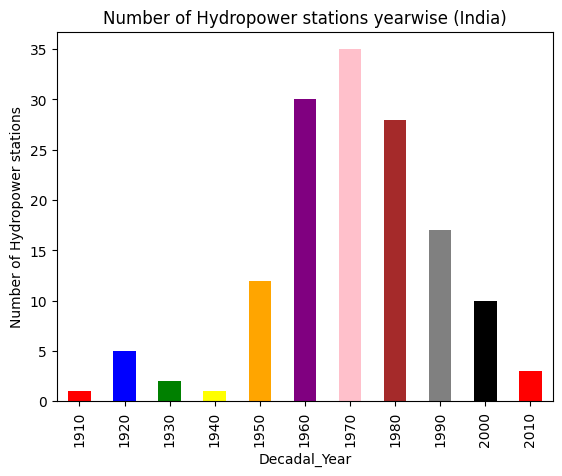

In [109]:
# Plot a bar diagram of number of dams with decadal year for India data
df_India['Decadal_Year'].value_counts().sort_index().plot(kind="bar")
# add chart title
plt.title("Number of Hydropower stations yearwise (India)")
# lable axes
plt.xlabel("Decadal Year Comissioned")
plt.ylabel("Number of Hydropower stations")
# Color bar
df_India['Decadal_Year'].value_counts().sort_index().plot(kind="bar", color=["red", "blue", "green", "yellow", "orange", "purple", "pink", "brown", "gray", "black"])

In [110]:
# Categroise number of hydro dams as per state wise
df_usa_group = df_usa.groupby("State")
df_usa_group.size()

,0
State,
Arizona,11
Arizona and California,3
Arizona and Nevada,1
California,43
California and Arizona,3
Colorado,55
Idaho,20
Kansas,9
Montana,24


In [111]:
# Geospatial location of dams of usa
import folium


In [112]:
# List top five states with highest number of dams
df_usa_group.size().sort_values(ascending=False).head(5)

,0
State,
Colorado,55
California,43
Oregon,28
Wyoming,28
Utah,25


<Axes: title={'center': 'Top Five States with highest number of Hydropower stations'}, xlabel='State', ylabel='Number of Hydropower stations'>

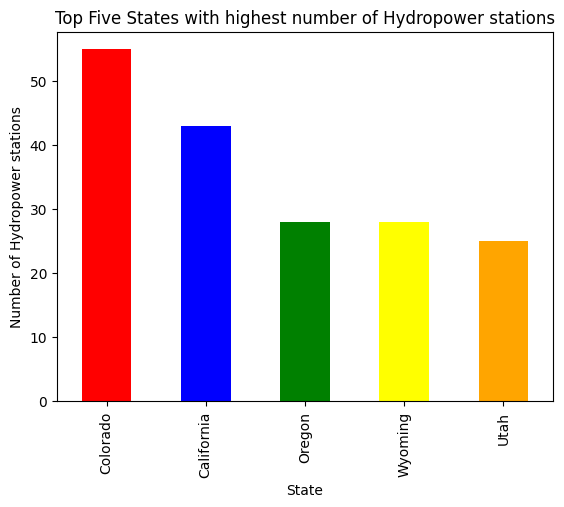

In [113]:
# Plot bar diagram of top five states with highest number of dams
df_usa_group.size().sort_values(ascending=False).head(5).plot(kind="bar")
# add chart title
plt.title("Top Five States with highest number of Hydropower stations")
# lable axes
plt.xlabel("State")
plt.ylabel("Number of Hydropower stations")
# Color bars
df_usa_group.size().sort_values(ascending=False).head(5).plot(kind="bar", color=["red", "blue", "green", "yellow", "orange"])

In [114]:
# Since we do not have state wise data for India, for analysis we can categorise district wise number of dams
# Distric wise number of dams in India data in descending order
df_India_group = df_India.groupby("District ")
df_India_group.size().sort_values(ascending=False)

,0
District,
Idukki,5
Nizamabad,2
Chamba,2
Dhanbad,2
Pathanamthitta,2
Balaght,1
Bijapur,1
Bellary,1
Baramulla,1


In [115]:
# top five districts with highest number of dams
df_India_group.size().sort_values(ascending=False).head(5)

,0
District,
Idukki,5
Nizamabad,2
Chamba,2
Dhanbad,2
Pathanamthitta,2


Text(0.5, 1.0, 'Top Five Districts with highest number of Hydropower stations')

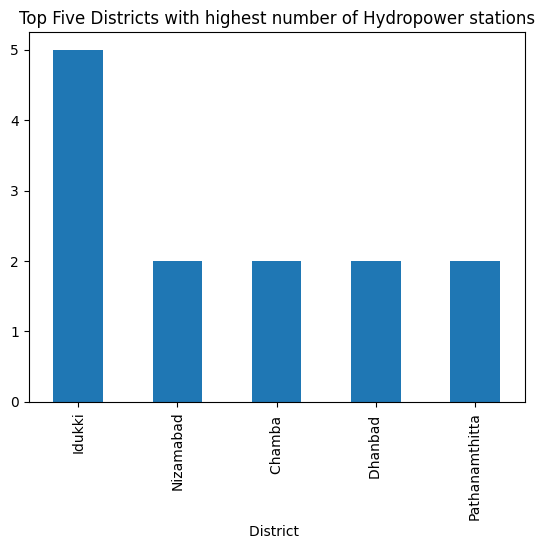

In [116]:
# Make a bar diagram of top five districts and show number of dams in the district
df_India_group.size().sort_values(ascending=False).head(5).plot(kind="bar")
# add chart title
plt.title("Top Five Districts with highest number of Hydropower stations")

In [117]:
# Categorise dams as per owner in descending order
df_usa_group = df_usa.groupby("Organisation")
df_usa_group.size().sort_values(ascending=False)

,0
Organisation,
Fryingpan-Arkansas,20
Colorado-Big Thompson,15
Boise,11
North Platte,10
Yakima,9
...,...
Uncompahgre,1
Washita Basin,1
Washita basin,1


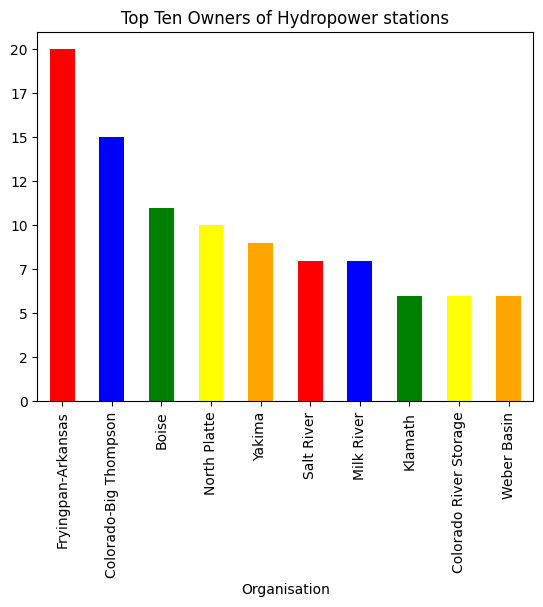

In [118]:
# Plot top ten owners
df_usa_group.size().sort_values(ascending=False).head(10).plot(kind="bar")
# add chart title
plt.title("Top Ten Owners of Hydropower stations")
# lable axes
plt.xlabel
# color bar
df_usa_group.size().sort_values(ascending=False).head(10).plot(kind="bar", color=["red", "blue", "green", "yellow", "orange"])
# y axes values in integer
plt.gcf().axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [119]:
# Categorise India data as per organisation owner
df_India_group = df_India.groupby("Owner ")
df_India_group.size().sort_values(ascending=False)

,0
Owner,
TANGEDCO,13
Kerala State Electricity Board Limited (KSEB),8
Government of Maharashtra,7
Kerala State Electricity Board,6
National Hydroelectric Power Corporation (NHPC),5
OHPC,5
Karnataka Power Corporation Ltd. (KPCL),5
Karnataka Power Corporation Ltd.,3
Maharashtra State Power Generation Co (MAHAGENCO),3


In [120]:
# top five organisations with ownership
df_India_group.size().sort_values(ascending=False).head(5)

,0
Owner,
TANGEDCO,13
Kerala State Electricity Board Limited (KSEB),8
Government of Maharashtra,7
Kerala State Electricity Board,6
National Hydroelectric Power Corporation (NHPC),5


<Axes: title={'center': 'Top Five Owners of Hydropower stations (India)'}, xlabel='Owner '>

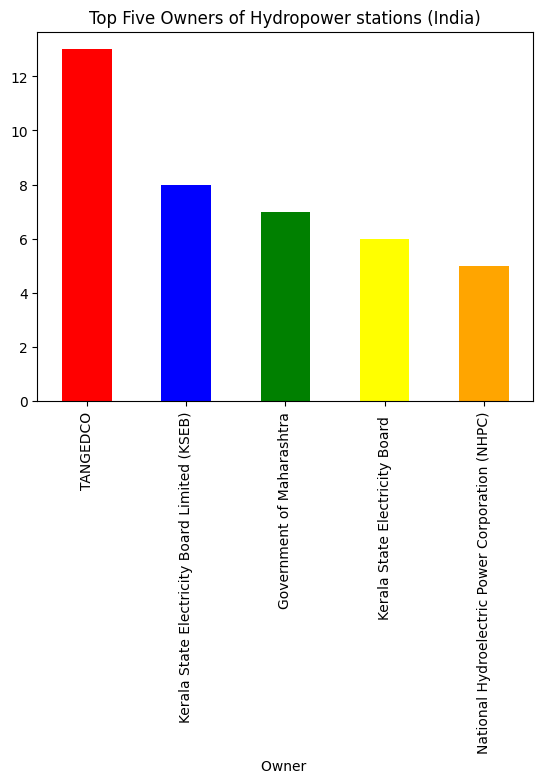

In [121]:
# Plot India data for top five organisations with ownership of dam
df_India_group.size().sort_values(ascending=False).head(5).plot(kind="bar")
# add chart title
plt.title("Top Five Owners of Hydropower stations (India)")
# Color bars
df_India_group.size().sort_values(ascending=False).head(5).plot(kind="bar", color=["red", "blue", "green", "yellow", "orange"])

In [122]:
# Calculate mean of each column with Dtype float
df_usa.mean(numeric_only=True)

,0
Crest Elevation (Feet),4193.727377
Crest Length (Feet),3066.320185
Structural Height (Feet),142.164290
Latitude (Degree North),40.538296
Longitude (Degree West),-109.111528
Year,1944.320988


Interpretation:  There is one data where Year is zero, so it is distorting the figure.

In [123]:
# Calculate number of unique value of each column with Dtype object
df_usa.nunique()

,0
Crest Elevation (Feet),302
Crest Length (Feet),262
Structural Height (Feet),207
Name,322
Watercourse,216
County,163
Latitude (Degree North),284
Longitude (Degree West),284
State,21
Organisation,144


Interpretation: Relevant Information for us is unique value of name, watercourse, county, state and year

# Change the Name of Column so that it can be read easily

In [124]:
# Change the name of Column name "Dimensions.Crest Elevation to "Crest Elevation", "Dimensions.Structural Height" to Structural Height",
# "Identity.Name" to "Name", "Identity.Watercourse" to "Watercourse",
# "Location.County" to "County",
# "Location.Latitude" to "Latitude", "Location.Longitude" to "Longitude",
# Change the name of Column name "Dimensions.Crest Elevation to "Crest Elevation", "Dimensions.Structural Height" to Structural Height",
# "Identity.Name" to "Name", "Identity.Watercourse" to "Watercourse",
# "Location.County" to "County",
# "Location.Latitude" to "Latitude", "Location.Longitude" to "Longitude",
# "Location.State" to "State", "Identity.Project.Organization" to "Organisation",
# "Identity.Project.Year" to "Year"

df_usa.rename(columns={"Dimensions.Crest Elevation": "Crest Elevation",
                     "Dimensions.Crest Length": "Crest Length", "Dimensions.Structural Height": "Structural Height",
"Identity.Name": "Name", "Identity.Watercourse": "Watercourse",
"Location.County": "County",
"Location.Latitude": "Latitude", "Location.Longitude": "Longitude",
"Location.State": "State", "Identity.Project.Organization": "Organisation",
"Identity.Project.Year": "Year"}, inplace=True)

Understand Data by looking at the content

In [125]:
df_usa.head()

,Crest Elevation (Feet),Crest Length (Feet),Structural Height (Feet),Name,Watercourse,County,Latitude (Degree North),Longitude (Degree West),State,Organisation,Year
0,1520.0,3800.00,86.00,Agate Dam,Dry Creek,Jackson,42.416,-122.772,Oregon,Rogue River Basin,1965
1,3348.0,1850.00,110.00,Agency Valley Dam,North Fork of the Malheur River,Malheur,43.912,-118.154,Oregon,Vale,1934
2,5510.0,76300.00,265.00,Alcova Dam,North Platte River,Natrona,42.548,-106.719,Wyoming,Kendrick,1935
3,2172.5,2784.18,132.17,Almena Diversion Dam,Prairie Dog Creek,Norton,39.767,-100.100,Kansas,PSMBP - Almena,1967
4,1564.0,1104.00,110.00,Altus Dam,"North Fork, Red River",Greer/Kiowa,34.883,-99.300,Oklahoma,W. C. Austin,1941


In [127]:
# unique values of Location.County
df_usa["County"].unique()

array(['Jackson', 'Malheur', 'Natrona', 'Norton', 'Greer/Kiowa',
       'Dona Ana, NM; El Paso, Tx', 'Power', 'Hot Springs', 'Elmore',
       'Klamath', 'Fall River', 'Sandoval', 'Yellowstone', 'Murray',
       'Boise/Elmore', 'Crook', 'Weber', 'Eddy', 'Merced', 'Beaverhead',
       'Maricopa', 'Unknown', 'Butte', 'Sweetwater', 'Gem', 'Gunnison',
       'Nevada', 'Ada', 'Yuma', 'Daws', 'Fremont', 'Santa Barbara',
       'Kiowa', 'Summit', 'Trinity', 'Park', 'Yakima', 'Coconino',
       'Sierra', 'El Dorado', 'Lewis and Clark', 'Santa Brbara',
       'Churchill', 'Eagle', 'Grand', 'Valley', 'Ventura', 'Trego',
       'Pitkin', 'Reno, Kingman, Sedgwick', 'Live Oak', 'Kittitas',
       'Modoc', 'Umatilla', 'Ravalli', 'Okanogan', 'Contra Costa',
       'Deschutes', 'Delta', 'Montrose', 'Hayes', 'Wasatch',
       'Mohave (AZ), Clark (NV)', 'Canyon', 'Pennington',
       'Storey, Washoe', 'Stark', 'Larimer', 'Phillips', 'Grant',
       'Scotts Bluff', 'Dawes', 'Morgan', 'Colusa', 'Chase', 'D

Text(0.5, 1.0, 'Structural Height Distribution')

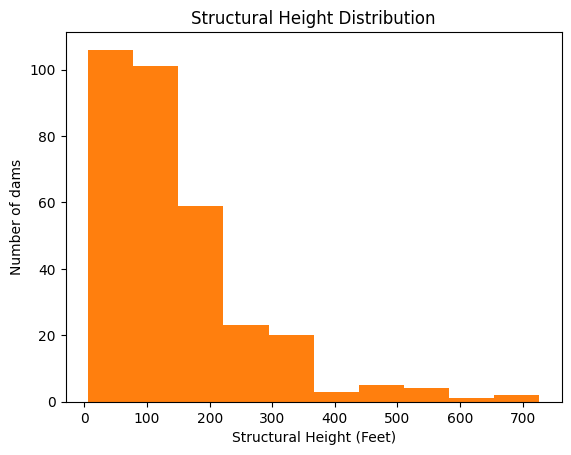

In [131]:
# make 10 bins of df_2 based on Dimensions.Structural Height
df_usa["Structural Height (Feet)"].plot(kind="hist", bins=10)
# lable axes and give a chart title
# make 10 bins of df_2 based on Dimensions.Structural Height
df_usa["Structural Height (Feet)"].plot(kind="hist", bins=10)
# lable axes and give a chart title
plt.xlabel("Structural Height (Feet)")
plt.ylabel("Number of dams")
plt.title("Structural Height Distribution")

Group by county and then identity watercourse

In [132]:
# organise the USA data in groupby county and then groupby identity watercourse
df_usa_group = df_usa.groupby(["County", "Watercourse"])
df_usa_group.head()

,Crest Elevation (Feet),Crest Length (Feet),Structural Height (Feet),Name,Watercourse,County,Latitude (Degree North),Longitude (Degree West),State,Organisation,Year
0,1520.00,3800.00,86.00,Agate Dam,Dry Creek,Jackson,42.416,-122.772,Oregon,Rogue River Basin,1965
1,3348.00,1850.00,110.00,Agency Valley Dam,North Fork of the Malheur River,Malheur,43.912,-118.154,Oregon,Vale,1934
2,5510.00,76300.00,265.00,Alcova Dam,North Platte River,Natrona,42.548,-106.719,Wyoming,Kendrick,1935
3,2172.50,2784.18,132.17,Almena Diversion Dam,Prairie Dog Creek,Norton,39.767,-100.100,Kansas,PSMBP - Almena,1967
4,1564.00,1104.00,110.00,Altus Dam,"North Fork, Red River",Greer/Kiowa,34.883,-99.300,Oklahoma,W. C. Austin,1941
...,...,...,...,...,...,...,...,...,...,...,...
331,5581.25,2464.00,37.00,Wind River Diversion Dam,Wind River,Fremont,43.225,-108.955,Wyoming,PSMBP - Riverton Unit,1921
332,1700.00,151.00,30.00,Woodston Diversion Dam,Solomon River,Rooks,39.449,-99.133,Kansas,PSMBP-Webster,1957
333,3004.00,325.00,10.50,Yellowstone River Diversion Dam,Yellowstone River,Yellowstone,45.875,-108.349,Montana,Huntley,1934
334,3197.50,1360.00,72.00,Yellowtail Afterbay Dam,Bighorn River,Big Horn,45.316,-107.921,Montana,"Yellowtail Unit, Pick-Sloan Missouri River Bas...",1964


In [133]:
# County with highest number of power stations
df_usa_group.size().sort_values(ascending=False).head(20)

,,0
County,Watercourse,
Larimer,Offstream Storage,5
Maricopa,Salt River,4
Natrona,North Platte River,4
Kittitas,Yakima River,3
Klamath,Lost River,3
Canyon,Offstream Storage,3
Park,Shoshone River,3
Pitkin,Cunningham Creek,3
"Imperial, CA; Yuma, AZ",Colorado River,3


Text(0.5, 1.0, 'County with highest number of power stations')

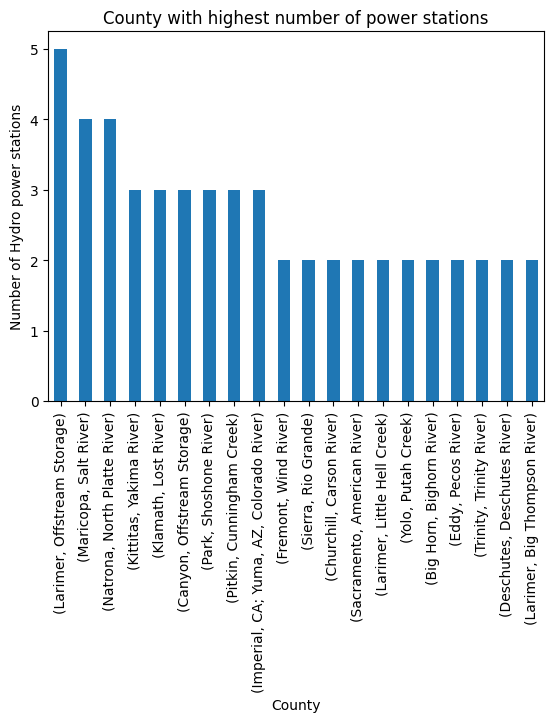

In [134]:
df_usa_group.size().sort_values(ascending=False).head(20).plot(kind="bar")
# add axes lable
plt.xlabel("County")
plt.ylabel("Number of Hydro power stations")
# add chart title
plt.title("County with highest number of power stations")

In [136]:
# number of power stations in each state
df_usa_group = df_usa.groupby("State")
df_usa_group.size().sort_values(ascending=False).head(20)

,0
State,
Colorado,55
California,43
Oregon,28
Wyoming,28
Utah,25
Montana,24
Idaho,20
Nebraska,18
Washington,16


# Plot number of hydro power stations in each county in descending order of number of stations

<Axes: title={'center': 'State with highest number of power stations'}, xlabel='State', ylabel='Number of Hydro power stations'>

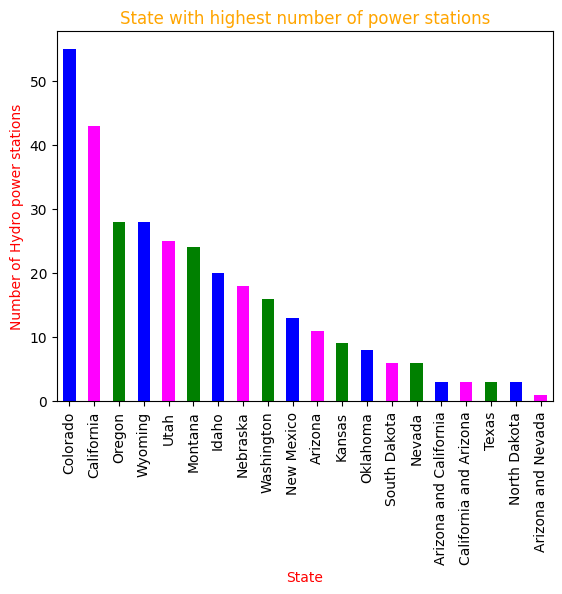

In [137]:
# plot hydropower data of USA with top 20 States in decreasing order
df_usa_group.size().sort_values(ascending=False).head(20).plot(kind="bar")
# lable axes and chart title in orange colour and axes lable in red colour
plt.xlabel("State", color = "red")
plt.ylabel("Number of Hydro power stations", color = "red")
plt.title("State with highest number of power stations", color="orange")
# plot above data
df_usa_group.size().sort_values(ascending=False).head(20).plot(kind="bar")
# lable axes and chart title in orange colour and axes lable in red colour
plt.xlabel("State", color = "red")
plt.ylabel("Number of Hydro power stations", color = "red")
plt.title("State with highest number of power stations", color="orange")
# give blue, magenta and green color to alternate bar
df_usa_group.size().sort_values(ascending=False).head(20).plot(kind="bar", color=["blue", "magenta", "green"])

In [138]:
# Arrange df_usa in ascending order of Year
df_usa = df_usa.sort_values(by="Year")
df_usa.head()

,Crest Elevation (Feet),Crest Length (Feet),Structural Height (Feet),Name,Watercourse,County,Latitude (Degree North),Longitude (Degree West),State,Organisation,Year
142,2780.00,2784.18,23.0,Hubbard Dam,Offstream Storage,Ada,43.512,-116.359,Idaho,Boise,1902
102,4649.00,960.00,50.0,Fish Lake Dam,North Fork Little Butte Creek,Jackson,42.378,-122.348,Oregon,Rogue River Basin,1902
303,2218.00,1210.00,357.0,Theodore Roosevelt Dam,Salt River,"Maricopa, Gila",33.672,-111.161,Arizona,Salt River,1903
206,4250.00,4475.00,86.0,Minidoka Dam,Snake River,Minidoka & Cassia,42.669,-113.484,Idaho,Minidoka,1904
82,4219.16,1331.00,31.0,Derby Diversion Dam,Truckee Rier,"Storey, Washoe",36.278,-97.502,Nevada,Newlands,1905


Data Cleaning where value of Year is zero

In [139]:
# count number of rows with Year as 0
df_usa[df_usa["Year"] == 0].count()

,0
Crest Elevation (Feet),0
Crest Length (Feet),0
Structural Height (Feet),0
Name,0
Watercourse,0
County,0
Latitude (Degree North),0
Longitude (Degree West),0
State,0
Organisation,0


In [140]:
# total number of rows with unique value for Year
df_usa["Year"].nunique()


77

# Number of power stations in each year - Yearwise

Text(0.5, 1.0, 'Number of Hydro power stations in each year')

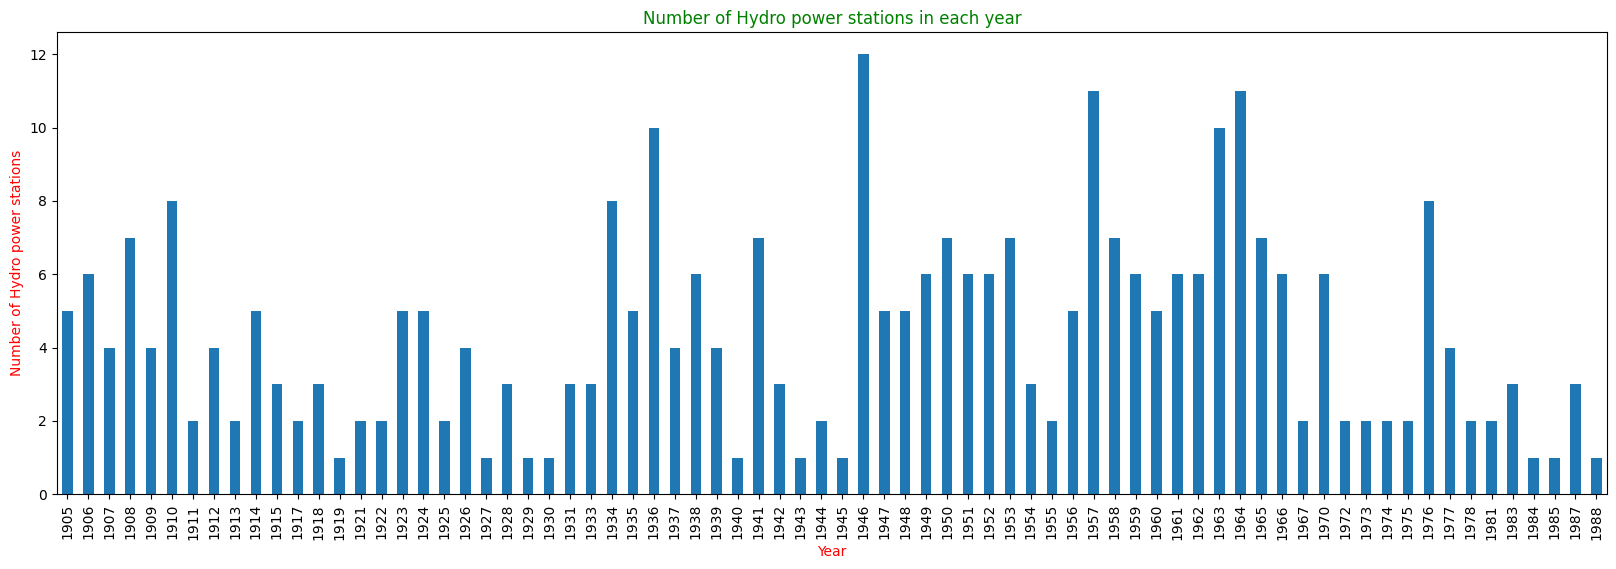

In [141]:
# plot Identity.Project.Year in each year in ascending order with dot diagram, after leaving first 3 bars
df_usa["Year"].value_counts().sort_index().iloc[3:].plot(kind="bar")



# increase the size of chart
plt.gcf().set_size_inches(20, 6)

# lable axes with red color, chart title in green color and bar with stripes of blue and magenta
plt.xlabel("Year", color="red")
plt.ylabel("Number of Hydro power stations", color="red")
plt.title("Number of Hydro power stations in each year", color="green")


Interpretaion of yearwise data on number of Hydropower station
In the initial years of the 20th century number of hydropower stations being constructed were relatively less, in single digit. The momentum decreased during the years when USA was engaged in First world war and during the great depression associated with financial crisis of late 1920s. Immediately after that state pushed for heavy investment in public infrastructure and we see increase in the number of hydropower staions during 1930s which again dipped during the years when USA was engaged in Second World War. Immediately after that rate of construction of hydropower dam picked momentum reaching double digits per year. Finally, with the start of environmental concerns during 1970s and in the years after that, we see the number of dam based power stations decreasing to 1 or 2 per year.

Text(0, 0.5, 'Number of Hydropower stations')

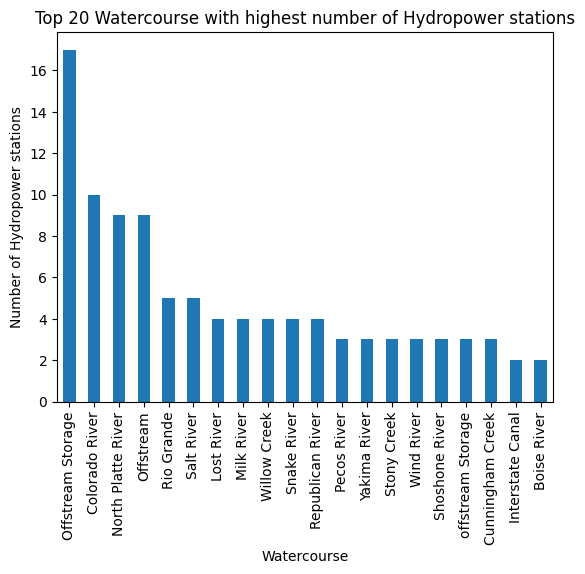

In [146]:
# plot number of power station on top 20 Identity.Watercourse in a bar chart
df_usa["Watercourse"].value_counts().head(20).plot(kind="bar")
# Add chart title and axes lable
plt.title("Top 20 Watercourse with highest number of Hydropower stations")
plt.xlabel("Watercourse")
plt.ylabel("Number of Hydropower stations")

